<a href="https://colab.research.google.com/github/XG11/ECE420FinalProject/blob/main/ECE420FinalProjectOpenCVmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
from scipy.spatial.distance import euclidean
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
from PIL import Image
import numpy as np

# Upload images
uploaded_images1 = files.upload()
uploaded_images2 = files.upload()

# Get file paths from the uploaded images
image_path1 = next(iter(uploaded_images1))
image_path2 = next(iter(uploaded_images2))

# Load the images as grayscale
image1 = Image.open(image_path1).convert('L')
image2 = Image.open(image_path2).convert('L')

# Convert images to numpy arrays
# Convert images to float32 type for gradient calculations
image1_np = np.array(image1, dtype=np.float32)
image2_np = np.array(image2, dtype=np.float32)


Saving images.jpg to images.jpg


Saving download.jpg to download.jpg


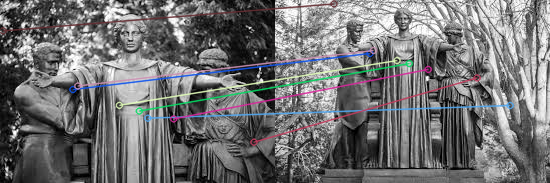

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the two images
img1 = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)  # Train image

# Check if images loaded properly
if img1 is None or img2 is None:
    print("Error loading images")
    exit()

# Step 1: Detect SIFT key points and descriptors
sift = cv2.SIFT_create()

# Find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 2: Use BFMatcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)  # L2 norm (Euclidean distance)

# Use KNN to find the best matches
matches = bf.knnMatch(des1, des2, k=2)

# Step 3: Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Lowe's ratio test
        good_matches.append(m)

# Step 4: Draw the matches
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 5: Display the result
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()
